In [8]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from kde_smooth import kde_smooth

SyntaxError: invalid syntax (BaseKDE.py, line 34)

In [2]:
def plot(a, **kwargs):
    fig, ax = plt.subplots(1,1, figsize=(8,6))
    cmap = kwargs.pop('cmap', 'Spectral')
    ax.imshow(a.T, aspect='auto', cmap=cmap, **kwargs)

In [3]:
# raw
a = np.load('/home/dup193/work/notebook/array_event_57.npy')
# simple gaussian smoothing
a_gauss = ndimage.gaussian_filter(a, sigma=(2,0))
# KDE smoothing
a_kde = kde_smooth(a)

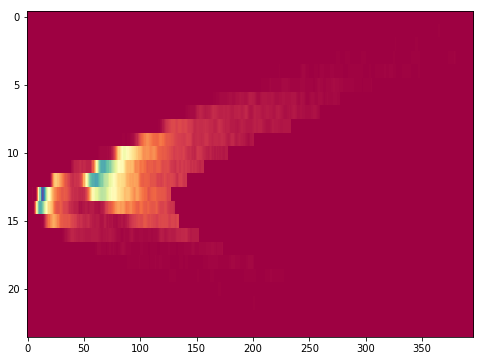

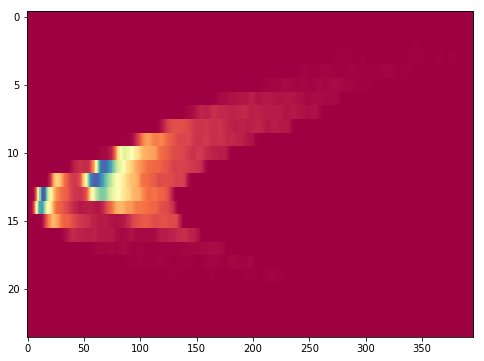

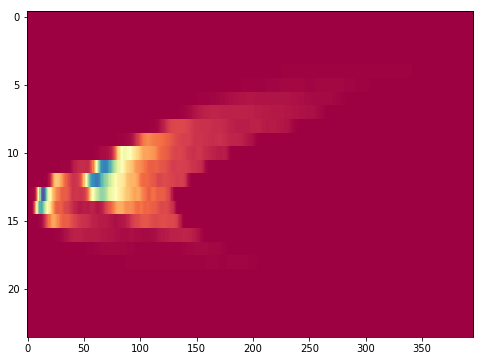

In [4]:
plot(a)
plot(a_gauss)
plot(a_kde)

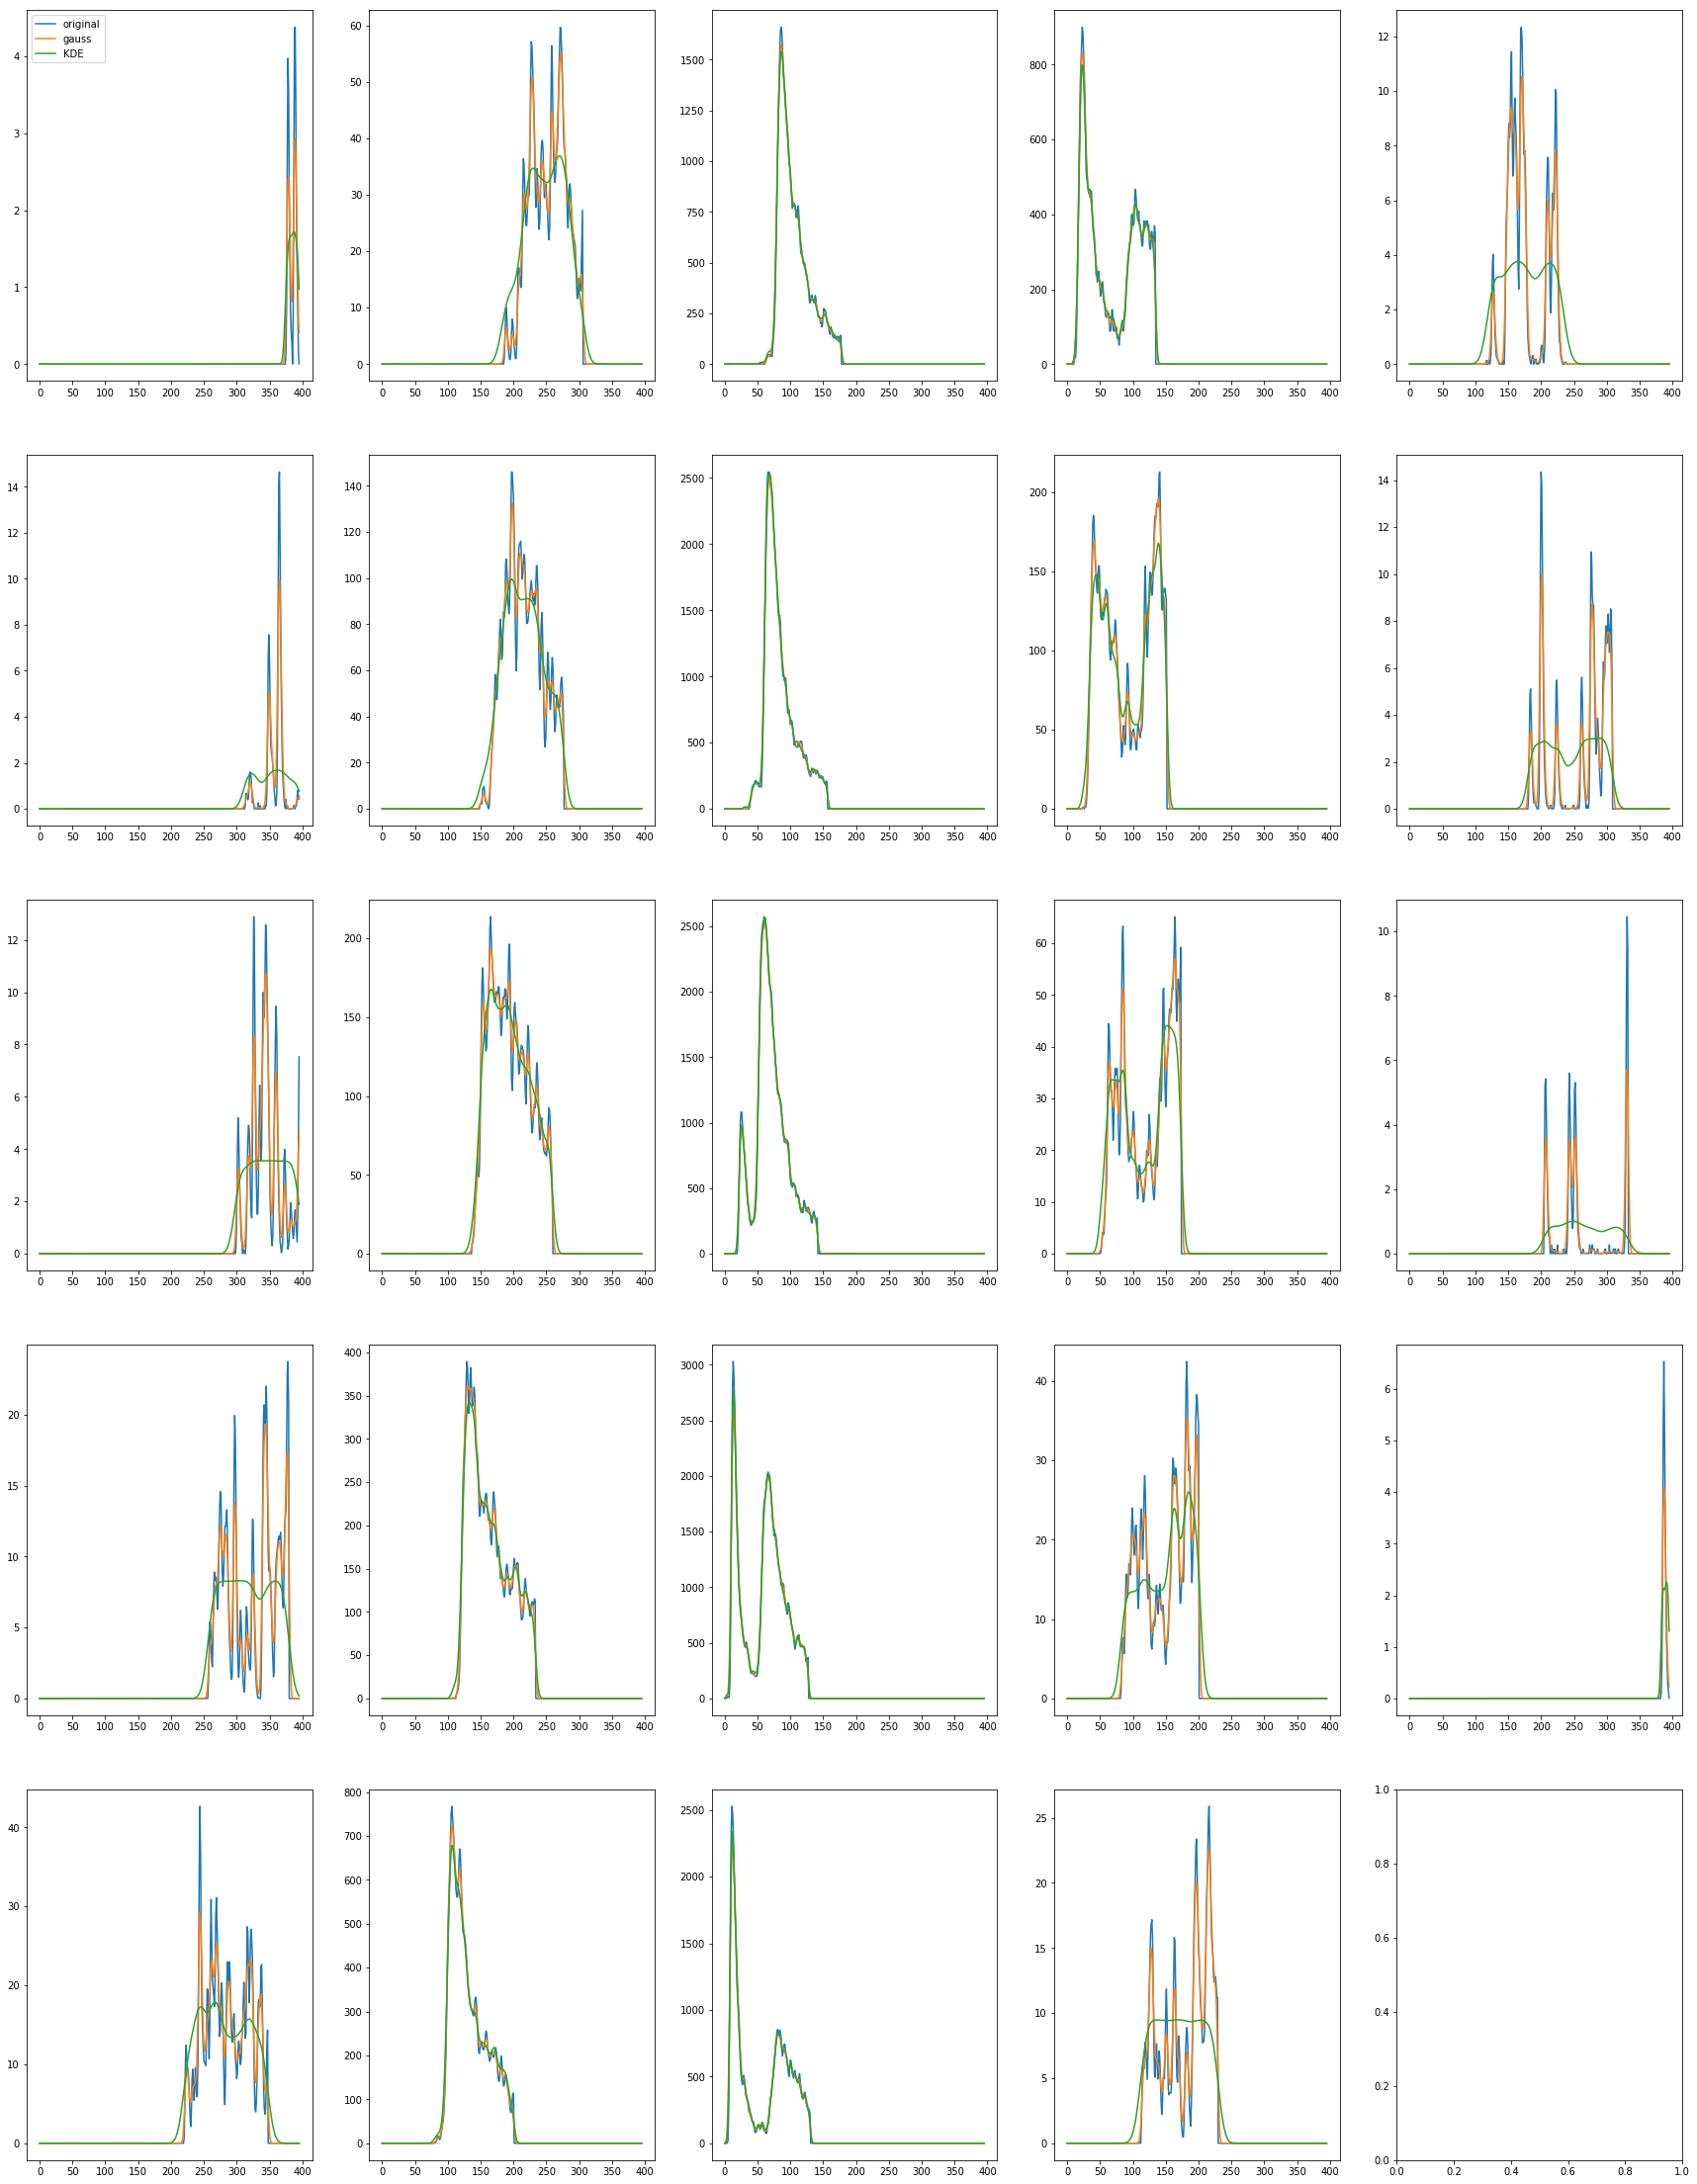

In [5]:
# individual waveforms

div = 5
z_indices = range(a.shape[1])
fig, ax = plt.subplots(div, len(z_indices)//div+1, figsize=(30,40))

for i, z_idx in enumerate(z_indices):

    axis = ax[i%div, i//div]

    x = np.arange(a.shape[0])
    y = a[:,z_idx]
    y_gauss = a_gauss[:,z_idx]
    y_kde = a_kde[:,z_idx]

    axis.plot(x,y, label='original')
    axis.plot(x,y_gauss, label='gauss')
    axis.plot(x,y_kde, label='KDE')

    if i == 0:
        axis.legend()